## Omitted From Book

Code to index the TheMovieDB corpus to Solr (takes a few minutes)

In [12]:
# Index TMDB Corpus
from time import perf_counter 
from ltr.client.solr_client import SolrClient
import json
client = SolrClient(host='http://localhost:8983/solr')

from ltr.index import rebuild
from ltr.helpers.movies import indexable_movies
movies=indexable_movies(movies='data/tmdb_ai_pow_search.json')
rebuild(client, index='tmdb', doc_src=movies)


Reconfig from disk...
Deleted index tmdb [Status: 200]
Created index tmdb [Status: 200]
Reindexing...
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
50

In [13]:
from ltr.client.solr_client import SolrClient

client = SolrClient(host='http://localhost:8983/solr')

## Listing 10.03

In [14]:
from ltr.judgments import Judgment

Judgment(grade=1, keywords='social network', doc_id=37799)

Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[],weight=1

## Listing 10.04

In [15]:

mini_judg_list=[
    # for 'social network' query
    Judgment(grade=1, keywords='social network', doc_id='37799'), #The Social Network
    Judgment(grade=0, keywords='social network', doc_id='267752'), # #chicagoGirl
    Judgment(grade=0, keywords='social network', doc_id='38408'), # Life As We Know It
    Judgment(grade=0, keywords='social network', doc_id='28303'), # The Cheyenne Social Club
    
    # for 'star wars' query
    Judgment(grade=1, keywords='star wars', doc_id='11'), # star wars
    Judgment(grade=1, keywords='star wars', doc_id='1892'), # return of jedi
    Judgment(grade=0, keywords='star wars', doc_id='54138'),# Star Trek Into Darkness
    Judgment(grade=0, keywords='star wars', doc_id='85783'), # The Star
    Judgment(grade=0, keywords='star wars', doc_id='325553'), # Battlestar Galactica
]

mini_judg_list

[Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=267752,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=38408,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=28303,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=11,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=1892,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=54138,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=85783,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=325553,features=[],weight=1]

## Listing 10.05

In [16]:
mini_judg_list[0].features


[]

## Listing 10.06

In [295]:
import requests

feature_set = [
    {
      "name" : "title_bm25",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : { #q=title:({$keywords})
        "q" : "title:(${keywords})"
      }
    },
    {
      "name" : "overview_bm25",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : {
        "q" : "overview:(${keywords})"
      }
    },
    {
      "name" : "release_year",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : {
        "q" : "{!func}release_year"
}}]

resp = requests.put('http://localhost:8983/solr/tmdb/schema/feature-store',
                    json=feature_set)
resp.text

'{\n  "responseHeader":{\n    "status":0,\n    "QTime":182}}\n'

## Listing 10.07 & 10.08

Listing 10.07 is the code, Listing 10.08 is the output

In [55]:
import requests

logging_solr_query = {
    "fl": "id,title,[features store=movies efi.keywords=\"social network\"]",
    'q': "id:37799 OR id:267752 id:38408 OR id:28303", #social network graded documents
    'rows': 10,
    'wt': 'json'  
}

resp = requests.post('http://localhost:8983/solr/tmdb/select',
                     data=logging_solr_query)

resp.json()

{'responseHeader': {'status': 0,
  'QTime': 18,
  'params': {'q': 'id:37799 OR id:267752 id:38408 OR id:28303',
   'fl': 'id,title,[features store=movies efi.keywords="social network"]',
   'rows': '10',
   'wt': 'json'}},
 'response': {'numFound': 4,
  'start': 0,
  'docs': [{'id': '28303',
    'title': ['The Cheyenne Social Club'],
    '[features]': 'title_bm25=7.5430527,overview_bm25=6.839079,release_year=1970.0'},
   {'id': '38408',
    'title': ['Life As We Know It'],
    '[features]': 'title_bm25=0.0,overview_bm25=9.576859,release_year=2010.0'},
   {'id': '37799',
    'title': ['The Social Network'],
    '[features]': 'title_bm25=18.135925,overview_bm25=8.391596,release_year=2010.0'},
   {'id': '267752',
    'title': ['#chicagoGirl'],
    '[features]': 'title_bm25=0.0,overview_bm25=13.237938,release_year=2013.0'}]}}

## Listing 10.09 output Generation Code

### The following code is omitted from the book, but the parsed output is included as listing 10.09

This code just shows boring parsing of the Solr logging response for a single query (`CURR_QID`). The `FeatureLogger` class does all this for you (and helps account for bookkeeping). But we do want to show what this would look like if you recreated this in your own code

In [20]:
# Save off features for qid=1
CURR_QID=1

solr_json = resp.json()
doc_id_to_features = {}

# Map Doc Id => Features
for doc in solr_json['response']['docs']:
    # Parse '[features] array', ie
    # title_bm25=0.0,overview_bm25=13.237938,vote_average=7.0'
    features = doc['[features]']
    features = features.split(',')
    features = [float(ftr.split('=')[1]) for ftr in features]
    
    doc_id_to_features[doc['id']] = features

# Save in correct judgment
for judgment in mini_judg_list:
    if judgment.qid == CURR_QID:
        try:
            judgment.features = doc_id_to_features[judgment.doc_id]
        except KeyError:
            pass

mini_judg_list

[Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[18.135925, 8.391596, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=267752,features=[0.0, 13.237938, 2013.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=38408,features=[0.0, 9.576859, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=28303,features=[7.5430527, 6.839079, 1970.0],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=11,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=1892,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=54138,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=85783,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=325553,features=[],weight=1]

## Listing 10.10 

Load full training set and log features for ~100 movie queries

In [25]:
from ltr.log import FeatureLogger
from ltr.judgments import judgments_open
from itertools import groupby
from ltr import download

judgments='http://es-learn-to-rank.labs.o19s.com/ai_pow_search_judgments.txt'
download([judgments], dest='data/')

ftr_logger=FeatureLogger(client, index='tmdb', feature_set='movies')

with judgments_open('data/ai_pow_search_judgments.txt') as judgment_list:
    for qid, query_judgments in groupby(judgment_list, key=lambda j: j.qid):
        ftr_logger.log_for_qid(judgments=query_judgments, 
                               qid=qid,
                               keywords=judgment_list.keywords(qid))
    
ftr_logger.logged

data/ai_pow_search_judgments.txt already exists
Recognizing 105 queries...
Searching tmdb [Status: 200]
Discarded 0 Keep 41
Searching tmdb [Status: 200]
Discarded 0 Keep 41
Searching tmdb [Status: 200]
Discarded 0 Keep 39
Searching tmdb [Status: 200]
Discarded 0 Keep 28
Searching tmdb [Status: 200]
Discarded 0 Keep 33
Searching tmdb [Status: 200]
Discarded 0 Keep 39
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 38
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 28
Searching tmdb [Status: 200]
Discarded 0 Keep 34
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 30
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Ke

[Judgment(grade=1,qid=1,keywords=rambo,doc_id=7555,features=[13.038148, 11.173398, 2008.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1370,features=[11.056428, 12.652582, 1988.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1369,features=[7.593794, 10.758981, 1985.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=13258,features=[0.0, 10.096009, 2007.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1368,features=[0.0, 11.867074, 1982.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=31362,features=[0.0, 8.33506, 1988.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=61410,features=[0.0, 4.6697874, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=319074,features=[0.0, 0.0, 2015.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=10296,features=[0.0, 0.0, 2004.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=35868,features=[0.0, 0.0, 2001.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=

# Normalization of Features
(Code Ommitted from chapter)

Normalize features after logging

In [200]:
def normalize_features(unnormed_judgments):
    all_features = []
    means = [0,0,0]
    for judgment in unnormed_judgments:
        for idx, f in enumerate(judgment.features):
            means[idx] += f
        all_features.append(judgment.features)
    
    for i in range(len(means)):
        means[i] /= len(unnormed_judgments)
      
    std_devs = [0.0, 0.0, 0.0]
    for judgment in unnormed_judgments:
        for idx, f in enumerate(judgment.features):
            std_devs[idx] += (f - means[idx])**2
            
    from math import sqrt
    for i in range(len(std_devs)):
        std_devs[i] /= len(unnormed_judgments)
        std_devs[i] = sqrt(std_devs[i])
        
    # Normalize!
    normed_judgments = []
    for judgment in unnormed_judgments:
        normed_features = [0.0] * len(judgment.features)
        for idx, f in enumerate(judgment.features):
            normed = (f - means[idx]) / std_devs[idx]
            normed_features[idx] = normed
        normed_judgment=Judgment(qid=judgment.qid,
                                 keywords=judgment.keywords,
                                 doc_id=judgment.doc_id,
                                 grade=judgment.grade,
                                 features=normed_features)
        normed_judgment.old_features=judgment.features
        normed_judgments.append(normed_judgment)

    return means, std_devs, normed_judgments

(Judgment(grade=1,qid=11,keywords=social network,doc_id=37799,features=[18.135925, 8.391596, 2010.0],weight=1,
 Judgment(grade=1,qid=11,keywords=social network,doc_id=37799,features=[4.48294116353365, 2.1000499226692053, 0.8347155270825962],weight=1)

# Listing 10.11

Normalize features for further processing

In [201]:
unnormed_judgments=ftr_logger.logged
means, std_devs, normed_judgments = normalize_features(unnormed_judgments)

unnormed_judgments[360], normed_judgments[360]

(Judgment(grade=1,qid=11,keywords=social network,doc_id=37799,features=[18.135925, 8.391596, 2010.0],weight=1,
 Judgment(grade=1,qid=11,keywords=social network,doc_id=37799,features=[4.48294116353365, 2.1000499226692053, 0.8347155270825962],weight=1)

## Plotting Helpers

Code omitted from the book. These are used to draw feature plots from the logged data

In [206]:
from ltr.judgments import judgments_to_nparray
import numpy as np 
import pylab as pl
import matplotlib as mpl
from ltr.helpers.movies import get_movie


normed_features, normed_predictors=judgments_to_nparray(normed_judgments)
features, predictors=judgments_to_nparray(ftr_logger.logged)

features.shape

for j in normed_judgments:
    if j.qid == 40:
        m = get_movie(j.doc_id)
        if (j.features[0] > 0.5):
            print(m['title'], j.features)

Star Wars [3.6200818033288136, -0.4444782048635971, -0.818183937213594]
Star Wars: The Force Awakens [2.3510635500245467, -0.4444782048635971, 1.0851548398547461]
Star Wars: The Clone Wars [3.0343023128830984, 3.1598071558510195, 0.7345398019737361]
Rogue One: A Star Wars Story [2.087995710176926, 1.0235656141452465, 1.1352427024091762]
Star Wars: Episode III - Revenge of the Sith [1.6873386201342857, -0.4444782048635971, 0.5842762143104462]
The Star [1.4682097299164052, -0.4444782048635971, -2.070380501074344]
Star! [1.808793873177223, -0.4444782048635971, -1.268974700203464]
Star Trek [1.4682097299164052, -0.4444782048635971, 0.7846276645281661]
Star Trek Into Darkness [1.0252340276809897, -0.4444782048635971, 0.9849791147458862]
Star Trek Beyond [1.2174985145278734, -0.4444782048635971, 1.1352427024091762]
Star Trek: Insurrection [1.2174985145278734, -0.4444782048635971, 0.23366117642943612]


In [222]:
# Crocodile Dundee and Rocky have nice Linear Shapes
# TODO -> pull in larger judgment list (that has social network, etc...)

from sklearn.linear_model import LinearRegression

norm = mpl.colors.Normalize(0,1.0)

def plot_qids(qids, predictors, features, xlabel, ylabel, focus=None):
    from ltr.helpers.movies import get_movie
    
    if focus is None:
        focus=qids
    
    from random import shuffle
    from itertools import product
    r = list(range(0,5,1)); shuffle(r)
    g = list(range(0,5,1)); shuffle(g)
    b = list(range(0,5,1)); shuffle(b)
    
    out_of_focus_alpha=0.1
    in_focus_alpha=0.9
    
    if len(qids) > 3:
        # Make a random set of colors per query
        colors = [[r*0.1,g*0.1,b*0.1,out_of_focus_alpha] for r,g,b in product(r,g,b)]
        shuffle(colors)
    else: # These are intentionally looking different
        max_c = 0.4
        colors = [[0,max_c,0,out_of_focus_alpha],
                  [max_c,0,0,out_of_focus_alpha],
                  [0,0,max_c,out_of_focus_alpha]]

    qid_col=predictors[:,1]
    qid_idxs=np.array([])
    kws = []
    markers=('.', 'P') # Negative / Positive relevance markers...
    legend_paths=[]
    legend_labels=[]
    for idx, qid in enumerate(qids):
        qid_idxs=np.argwhere(qid_col==qid).ravel().astype(int)
        judgment=ftr_logger.logged[np.asscalar(qid_idxs[-1])]
        kws.append(judgment.keywords)
        x_qidA = features[qid_idxs]
        x_qidA
        y_qidA = predictors[qid_idxs, 0] 
        color = colors[idx]
        if qid in focus:
            color[3] = in_focus_alpha
        for grade in [1,0]:
            this_grade=np.argwhere(y_qidA==grade)
            path = pl.scatter(x_qidA[this_grade,0], 
                              x_qidA[this_grade,1], 
                               marker=markers[grade], 
                               facecolors=color,
                               edgecolors=color,
                               norm=norm)
            legend_paths.append(path)
            if grade == 0:
                legend_labels.append(judgment.keywords + " irrelevant")
            else:
                legend_labels.append(judgment.keywords + " relevant")

        
    
    pl.title("Relevances for keywords: {:.25}".format(",".join(kws)))
    pl.xlabel(xlabel=xlabel)
    pl.ylabel(ylabel=ylabel)
    pl.legend(legend_paths, legend_labels, loc='lower center',
              bbox_to_anchor=[0.5,-0.5])
    pl.savefig('fig.png', dpi=300)

#plot_all(predictors)

def plot_ungrouped(features, predictors, title, 
                   graph_features=[0,1],
                   xlabel="Delta Title BM25",
                   ylabel="Delta Overview BM25"):
    from ltr.helpers.movies import get_movie
   
    legend_paths=[]
    for pred in [-1,1]:
        if pred == -1:
            marker = '.'
        elif pred == 1:
            marker = '+'
        path = pl.scatter(features[predictors==pred, graph_features[0]], 
                          features[predictors==pred, graph_features[1]], 
                           marker=marker)
        legend_paths.append(path)
        
    
    pl.title(title)
    pl.xlabel(xlabel=xlabel)
    pl.ylabel(ylabel=ylabel)
    pl.legend(legend_paths, ["Irrelevant", "Relevant"], loc='lower center',
              bbox_to_anchor=[0.5,-0.5])
    pl.savefig('all_relevances.png', dpi=300)

## Figures 3-5, 8 Source Plot

Source materials for figure 3-5 (which also are marked up via google slides)

https://docs.google.com/presentation/d/1Wd7VFFNu8HSujsCU4AYF2bGegHYTqyXwmE3gZ8Yb1Kc/edit#slide=id.g867f1c54dc_0_5

## Figure 10.7 Source Plot

Show Star Wars and Social Network from predictors

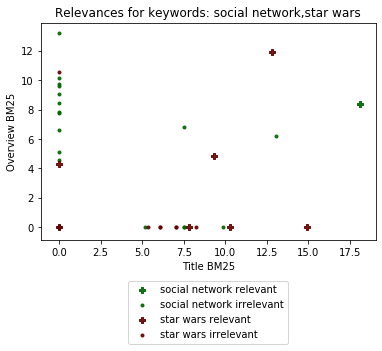

In [209]:
plot_qids(qids=[11,40], focus=[11,40], 
          xlabel="Title BM25",
          ylabel="Overview BM25",
          predictors=predictors,
          features=features)

# Figure 10.8 - 10.12

Normalized view of predictors

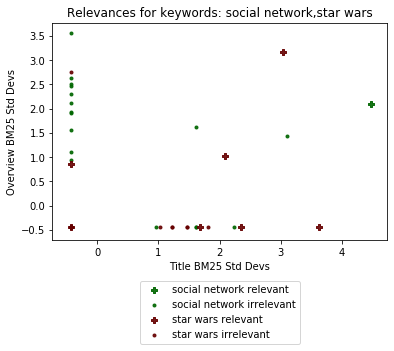

In [210]:
plot_qids(qids=[11,40], 
          predictors=normed_predictors,
          xlabel="Title BM25 Std Devs",
          ylabel="Overview BM25 Std Devs",
          features=normed_features)

## Listing 10.13

Translating psudeocode algorithm for pairwise transform into Python

In [211]:
import numpy as np
from ltr.judgments import judgments_from_file, judgments_to_nparray

def pairwise_transform(normed_judgments):
        
    from itertools import groupby
    ungrouped_predictors = []
    ungrouped_features = []
    for qid, query_judgments in groupby(normed_judgments, key=lambda j: j.qid):

        judg_list_copy_1 = list(query_judgments)
        judg_list_copy_2 = list(judg_list_copy_1)

        for judgment1 in judg_list_copy_1:
            for judgment2 in judg_list_copy_2:
                assert judg_list_copy_1 == judg_list_copy_2
                if judgment1.grade > judgment2.grade:
                    ungrouped_predictors.append(+1)
                    ungrouped_features.append(
                        np.array(judgment1.features) - np.array(judgment2.features)
                    )
                elif judgment1.grade < judgment2.grade:
                    ungrouped_predictors.append(-1)
                    ungrouped_features.append(
                        np.array(judgment1.features) - np.array(judgment2.features)
                    )

    return np.array(ungrouped_features), np.array(ungrouped_predictors)

features, predictors = pairwise_transform(normed_judgments)


## Figure 10.13 Source Plot

Graphing just the features/predictors for 'star wars' and 'social network'

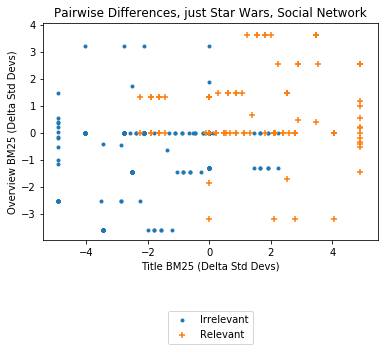

In [226]:
just_star_wars_social_network = []
for j in normed_judgments:
    if j.qid == 11 or j.qid == 40:
        just_star_wars_social_network.append(j)

features, predictors = pairwise_transform(just_star_wars_social_network)
plot_ungrouped(features, predictors,
               xlabel="Title BM25 (Delta Std Devs)",
               ylabel="Overview BM25 (Delta Std Devs)",
               title="Pairwise Differences, just Star Wars, Social Network")

## Figure 10.14

All relevance pairwise differences

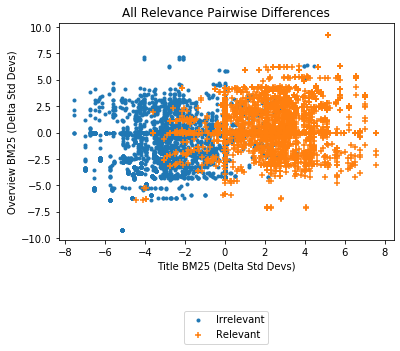

In [227]:
features, predictors = pairwise_transform(normed_judgments)
plot_ungrouped(features, predictors,
               xlabel="Title BM25 (Delta Std Devs)",
               ylabel="Overview BM25 (Delta Std Devs)",
               title="All Relevance Pairwise Differences")

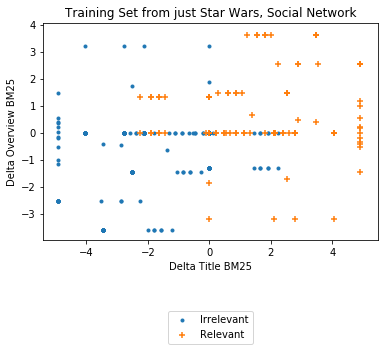

In [192]:
just_star_wars_social_network = []
for j in normed_judgments:
    if j.qid == 11 or j.qid == 40:
        just_star_wars_social_network.append(j)

features, predictors = pairwise_transform(just_star_wars_social_network)
plot_ungrouped(features, predictors,title="Training Set from just Star Wars, Social Network")

Training the model with sklearn

In [239]:
from sklearn import svm
model = svm.LinearSVC(max_iter=10000, verbose=1)
model.fit(features, predictors)
model.coef_

[LibLinear]

array([[0.40512169, 0.29006365, 0.14451721]])

In [302]:
# If you wanted to confirm Wrath of Khans features
import requests

logging_solr_query = {
    "fl": "id,title,[features store=movies efi.keywords=\"wrath of khan\"]",
    'q': "id:154", #social network graded documents
    'rows': 10,
    'wt': 'json'  
}

resp = requests.post('http://localhost:8983/solr/tmdb/select',
                     data=logging_solr_query)

# Features Solr returns
wok_features = [13.027779, 7.483282, 1982.0]
spock_features = [0.0,0.0,1984.0]

# Normalized
normed_wok_features = [0,0,0]
for idx, f in enumerate(wok_features):
    normed_wok_features[idx] = (f - means[idx]) / std_devs[idx]

normed_spock_features = [0,0,0]
for idx, f in enumerate(spock_features):
    normed_spock_features[idx] = (f - means[idx]) / std_devs[idx]
    
normed_spock_features

[-0.4319807684776348, -0.4444782048635971, -0.4675688993325839]

In [300]:
def score_one(features, model):
    score = 0.0
    print("Feature * Weight")
    for idx, f in enumerate(features):
        this_coef = np.asscalar(model.coef_[0][idx])
        score += f * this_coef

        # Explain for this feature
        print(" {:1.5f} * {:1.5f} ".format(f, this_coef))
        if (idx < len(features) - 1):
            print("+")
    
    print('= %s' % score)
    
    return score


score_one(normed_wok_features, model)

Feature * Weight
 3.09861 * 0.40161 
+
 1.82463 * 0.29207 
+
 -0.56774 * 0.11502 
= 1.7120582240975442


1.7120582240975442

In [286]:
def score_one(features, model):
    score = 0.0
    for idx, f in enumerate(features):
        this_coef = np.asscalar(model.coef_[0][idx])
        score += f * this_coef
    
    return score


score_one(test_data[0].features, model)

3.822587064188325

In [294]:
def rank(query_judgments, model):
    for j in query_judgments:
        j.score = score_one(j.features, model)
    
    return sorted(query_judgments, key=lambda j: j.score, reverse=True)


for qid, query_judgments in groupby(test_data, key=lambda j: j.qid):
    query_judgments = list(query_judgments)
    ranked = rank(query_judgments, model)
    tot_relevant = 0
    for j in ranked[:4]:
        if j.grade == 1:
            tot_relevant += 1
        print(j.doc_id, j.grade, j.score)
    query_prec = tot_relevant/4.0
    print("Prec {:1.3}".format(tot_relevant/4.0))
    print('---')



9671 1 3.822587064188325
9290 1 2.7558666386352866
25652 0 1.8933064546792542
9396 1 1.6775514465670522
Prec 0.75
---
364067 1 1.8933350963712274
26386 0 1.7027349326639127
340402 0 0.9662414081502984
9656 0 0.9336236098309125
Prec 0.25
---
183894 1 2.022645511889139
3573 1 1.7934466508046196
12254 1 1.5632726537132657
104221 1 1.534463199457461
Prec 1.0
---
680 1 1.9450005522353477
28131 0 1.8611785319972864
18451 0 1.0917918394930692
37988 0 0.9657793827203472
Prec 0.25
---
36970 0 1.236327958564997
161 1 0.9442162010642329
299 1 0.7080169436061488
30846 0 0.6168416247877988
Prec 0.5
---
9760 0 0.44079957491050814
309299 0 -0.17849650412226534
273895 0 -0.18425746162124296
136795 1 -0.19001841912022066
Prec 0.25
---
59859 0 -0.19001841912022066
249397 0 -0.19001841912022066
49519 0 -0.19001841912022066
136400 0 -0.19001841912022066
Prec 0.0
---
207703 0 -0.18425746162124296
242582 0 -0.18425746162124296
84351 0 -0.1957793766191983
37414 0 -0.20730129161715363
Prec 0.0
---
139038 0 -0

Training test split

In [341]:
import random

all_qids = list(set([j.qid for j in normed_judgments]))
random.shuffle(all_qids)

proportion_train=0.1

test_train_split_idx = int(len(all_qids) * proportion_train)
test_qids=all_qids[:test_train_split_idx]
train_qids=all_qids[test_train_split_idx:]

test_qids,train_qids

train_data = []; test_data=[]
for j in normed_judgments:
    if j.qid in train_qids:
        train_data.append(j)
    elif j.qid in test_qids:
        test_data.append(j)

In [342]:


train_data_features, train_data_predictors = pairwise_transform(train_data)

from sklearn import svm
model = svm.LinearSVC(max_iter=10000, verbose=1)
model.fit(train_data_features, train_data_predictors)
model.coef_[0]

[LibLinear]

array([0.44917417, 0.31118625, 0.1397171 ])

In [343]:
def score_one(features, model):
    score = 0.0
    for idx, f in enumerate(features):
        this_coef = np.asscalar(model.coef_[0][idx])
        score += f * this_coef
    
    return score

def rank(query_judgments, model):
    for j in query_judgments:
        j.score = score_one(j.features, model)
    
    return sorted(query_judgments, key=lambda j: j.score, reverse=True)

def eval_model(test_data, model):
    
    tot_prec = 0
    num_queries = 0

    for qid, query_judgments in groupby(test_data, key=lambda j: j.qid):
        query_judgments = list(query_judgments)

        ranked = rank(query_judgments, model)

        tot_relevant = 0
        for j in ranked[:4]:
            if j.grade == 1:
                tot_relevant += 1
        query_prec = tot_relevant/4.0
        tot_prec += query_prec
        num_queries += 1
    
    return tot_prec / num_queries

eval_model(test_data, model)

0.325

In [326]:
np.random.rand(1,3)

array([[0.49387481, 0.68178131, 0.00638919]])

In [349]:
linear_model = {
  "store": "movies",
  "class": "org.apache.solr.ltr.model.LinearModel",
  "name": "movie_titles",
  "features": [
  ],
  "params": {
      "weights": {
      }
  }
}

import math
ftr_model = {}
ftr_names = [ftr['name'] for ftr in feature_set]
for idx, ftr_name in enumerate(ftr_names):
    config = {
        "name": ftr_name,
        "norm": {
            "class": "org.apache.solr.ltr.norm.StandardNormalizer",
            "params": {
                "avg": str(means[idx]),
                "std": str(std_devs[idx])
            }
        }
    }
    linear_model['features'].append(config)
    linear_model['params']['weights'][ftr_name] =  model.coef_[0][idx] 

print(json.dumps(linear_model, indent=2))

{
  "store": "movies",
  "class": "org.apache.solr.ltr.model.LinearModel",
  "name": "movie_titles",
  "features": [
    {
      "name": "title_bm25",
      "norm": {
        "class": "org.apache.solr.ltr.norm.StandardNormalizer",
        "params": {
          "avg": "1.5939970007512951",
          "std": "3.689972140122766"
        }
      }
    },
    {
      "name": "overview_bm25",
      "norm": {
        "class": "org.apache.solr.ltr.norm.StandardNormalizer",
        "params": {
          "avg": "1.4658440933160637",
          "std": "3.2978986984657808"
        }
      }
    },
    {
      "name": "release_year",
      "norm": {
        "class": "org.apache.solr.ltr.norm.StandardNormalizer",
        "params": {
          "avg": "1993.3349740932642",
          "std": "19.964916628520722"
        }
      }
    }
  ],
  "params": {
    "weights": {
      "title_bm25": 0.4491741700850341,
      "overview_bm25": 0.31118624504321124,
      "release_year": 0.13971710392127754
    }
  }
